In [87]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv('adult.data.csv', sep=',')

In [34]:
data.head()

,age,workclass,fnwgt,education,education_num,material_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
data.shape

(32561, 15)

In [36]:
data.dtypes

age                 int64
workclass          object
fnwgt               int64
education          object
education_num       int64
material_status    object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
salary             object
dtype: object

In [37]:
data.isnull().sum()

age                   0
workclass          1836
fnwgt                 0
education             0
education_num         0
material_status       0
occupation         1843
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      583
salary                0
dtype: int64

In [42]:
ColumnsWithEmpty = []
for column in data.columns:
    # Количество пустых значений 
    NullCount = data[column].isnull().sum()
    if NullCount > 0:
        ColumnsWithEmpty.append(column)
        print('Колонка {0}. Тип данных {1}. Количество пустых значений {2}.'.format(column, str(data[column].dtype), NullCount))

Колонка workclass. Тип данных object. Количество пустых значений 1836.
Колонка occupation. Тип данных object. Количество пустых значений 1843.
Колонка native_country. Тип данных object. Количество пустых значений 583.


In [40]:
# Обработка методом удаления строк с пустыми значениями:
data2 = data.dropna(axis=0, how='any')
(data.shape, data2.shape)
print('Число записей до удаления:', data.shape[0])
print('Число записей после удаления:', data2.shape[0])
print("Процент потерь данных: {0} %".format(round((data.shape[0]-data2.shape[0])/data.shape[0]*100, 4)))

Число записей до удаления: 32561
Число записей после удаления: 30162
Процент потерь данных: 7.3677 %


In [41]:
# Обработка методом удаления столбцов с пустыми значениями:
data3 = data.dropna(axis=1, how='any')
print('Число колонок до удаления:', data.shape[1])
print('Число колонок после удаления:', data3.shape[1])
print("Процент потерь данных: {0} %".format(round((data.shape[1]-data3.shape[1])/data.shape[1]*100, 4)))

Число колонок до удаления: 15
Число колонок после удаления: 12
Процент потерь данных: 20.0 %


In [59]:
# Обработка методом заполнения строкой:
WorkClassTemp = data[['workclass']]
OccupationTemp = data[['occupation']]
NativeCountryTemp = data[['native_country']]
Imputation = SimpleImputer(missing_values = np.nan, strategy = 'constant', fill_value = 'Unknown')
WorkClassImp = Imputation.fit_transform(WorkClassTemp)
np.unique(WorkClassImp)

array([' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
       ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay',
       'Unknown'], dtype=object)

In [60]:
OccupationImp = Imputation.fit_transform(OccupationTemp)
np.unique(OccupationImp)

array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving', 'Unknown'], dtype=object)

In [61]:
NativeCountryImp = Imputation.fit_transform(NativeCountryTemp)
np.unique(NativeCountryImp)

array([' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' Iran', ' Ireland', ' Italy', ' Jamaica', ' Japan', ' Laos',
       ' Mexico', ' Nicaragua', ' Outlying-US(Guam-USVI-etc)', ' Peru',
       ' Philippines', ' Poland', ' Portugal', ' Puerto-Rico',
       ' Scotland', ' South', ' Taiwan', ' Thailand', ' Trinadad&Tobago',
       ' United-States', ' Vietnam', ' Yugoslavia', 'Unknown'],
      dtype=object)

In [71]:
# Преобразование категориальных данных в числовые
WorkClassEnc = pd.DataFrame({'workclass':WorkClassImp.T[0]})
LaEnc = LabelEncoder()
WorkClassLaEnc = LaEnc.fit_transform(WorkClassEnc['workclass'])
print('WorkClassEnc unique values:\n{}\n'.format(WorkClassEnc['workclass'].unique()))
print('WorkClassLaEnc unique values:\n{}'.format(np.unique(WorkClassLaEnc)))
LaEnc.inverse_transform(WorkClassLaEnc)

WorkClassEnc unique values:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 'Unknown' ' Self-emp-inc' ' Without-pay' ' Never-worked']

WorkClassLaEnc unique values:
[0 1 2 3 4 5 6 7 8]


array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [75]:
OHEnc = OneHotEncoder()
WorkClassOHEnc = OHEnc.fit_transform(WorkClassEnc[['workclass']])
print('Число колонок в WorkClassEnc:\n{}\n'.format(WorkClassEnc.shape[1]))
print('Число колонок в WorkClassHOEnc:\n{}\n'.format(WorkClassOHEnc.shape[1]))

Число колонок в WorkClassEnc:
1

Число колонок в WorkClassHOEnc:
9



In [81]:
WorkClassOHEnc.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [80]:
WorkClassEnc.head(10)

,workclass
0,State-gov
1,Self-emp-not-inc
2,Private
3,Private
4,Private
5,Private
6,Private
7,Self-emp-not-inc
8,Private
9,Private


До масштабирования


<function matplotlib.pyplot.show(*args, **kw)>

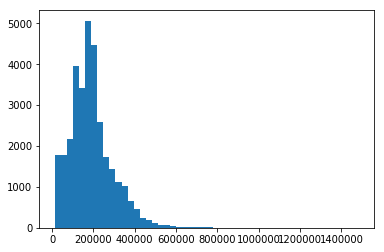

In [94]:
# Масштабирование данных
print('До масштабирования')
plt.hist(data['fnwgt'], 50)
plt.show


C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMax масштабирование


<function matplotlib.pyplot.show(*args, **kw)>

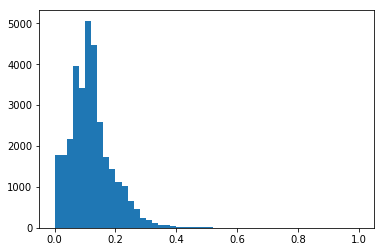

In [96]:
Scaler1 = MinMaxScaler()
ScaledFNWGT1 = Scaler1.fit_transform(data[['fnwgt']])
print('MinMax масштабирование')
plt.hist(ScaledFNWGT1, 50)
plt.show

Масштабирование на основе Z-оценки


C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


<function matplotlib.pyplot.show(*args, **kw)>

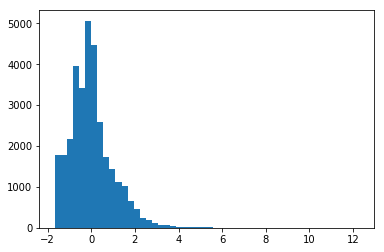

In [98]:
Scaler2 = StandardScaler()
ScaledFNWGT2 = Scaler2.fit_transform(data[['fnwgt']])
print('Масштабирование на основе Z-оценки')
plt.hist(ScaledFNWGT2, 50)
plt.show

Нормализация


<function matplotlib.pyplot.show(*args, **kw)>

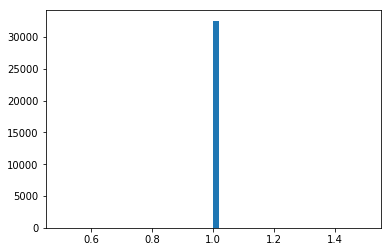

In [99]:
Scaler3 = Normalizer()
ScaledFNWGT3 = Scaler3.fit_transform(data[['fnwgt']])
print('Нормализация')
plt.hist(ScaledFNWGT3, 50)
plt.show